In [41]:
#All imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import warnings
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, fbeta_score

### Loading and analyzing data - analysis/description provided in the report

In [42]:
raw_data = pd.read_csv('raw_diabetes_dataset.csv')
raw_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [43]:

raw_data = raw_data.astype(float)
raw_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    float64
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    float64
 8   Outcome                   768 non-null    float64
dtypes: float64(9)
memory usage: 54.1 KB


In [44]:
raw_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [45]:
has_inf = np.isinf(raw_data).values.any()

if has_inf:
    print("The dataset contains infinite values.\n")
else:
    print("The dataset does not contain infinite values.\n")

# Check for negative values in each column
negative_values = raw_data.lt(0).any()

# Print the columns that contain negative values
for column, has_negative in negative_values.items():
    if has_negative:
        print(f"The column '{column}' contains negative values.")
    else:
        print(f"The column '{column}' does not contain negative values.")

The dataset does not contain infinite values.

The column 'Pregnancies' does not contain negative values.
The column 'Glucose' does not contain negative values.
The column 'BloodPressure' does not contain negative values.
The column 'SkinThickness' does not contain negative values.
The column 'Insulin' does not contain negative values.
The column 'BMI' does not contain negative values.
The column 'DiabetesPedigreeFunction' does not contain negative values.
The column 'Age' does not contain negative values.
The column 'Outcome' does not contain negative values.


#### Distribution Plots

/Users/nnidadavolu/opt/anaconda3/envs/umlt/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/nnidadavolu/opt/anaconda3/envs/umlt/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/nnidadavolu/opt/anaconda3/envs/umlt/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/nnidadavolu/opt/anaconda3/envs/umlt/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: us

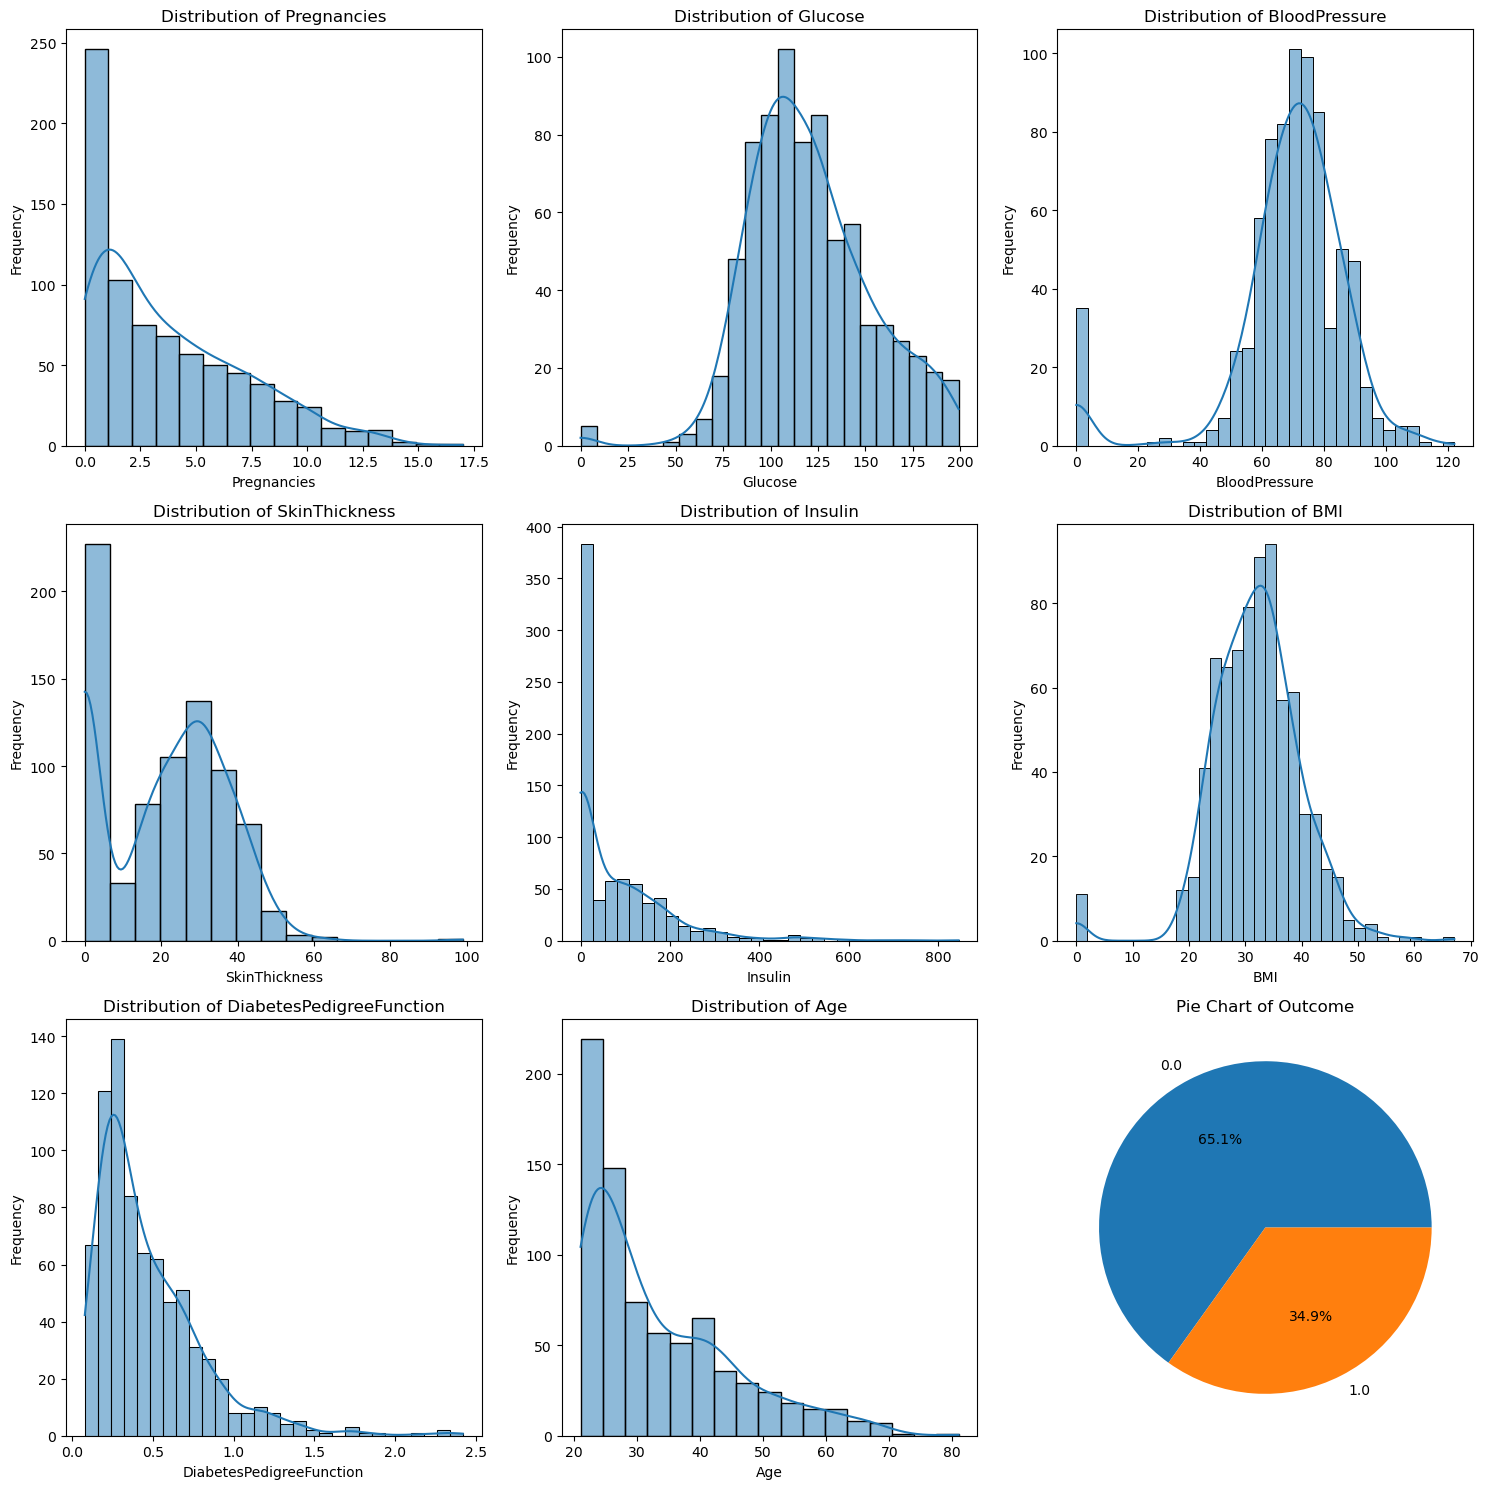

In [46]:
#Matrix of plots of each feature of the dataset
n_cols = 3  
n_rows = (len(raw_data.columns) + n_cols - 1) // n_cols  

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))
axes = axes.flatten()

# Plot each feature column
for i, column in enumerate(raw_data.columns[:-1]):
    sns.histplot(raw_data[column], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

# Plot pie chart for the target label to understand feature distribution
last_column = raw_data.columns[-1]
last_column_data = raw_data[last_column].dropna()
axes[-1].pie(last_column_data.value_counts(), labels=last_column_data.value_counts().index, autopct='%1.1f%%')
axes[-1].set_title(f'Pie Chart of {last_column}')

# Remove any empty subplots
for j in range(len(raw_data.columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

#### Correlation Matrix

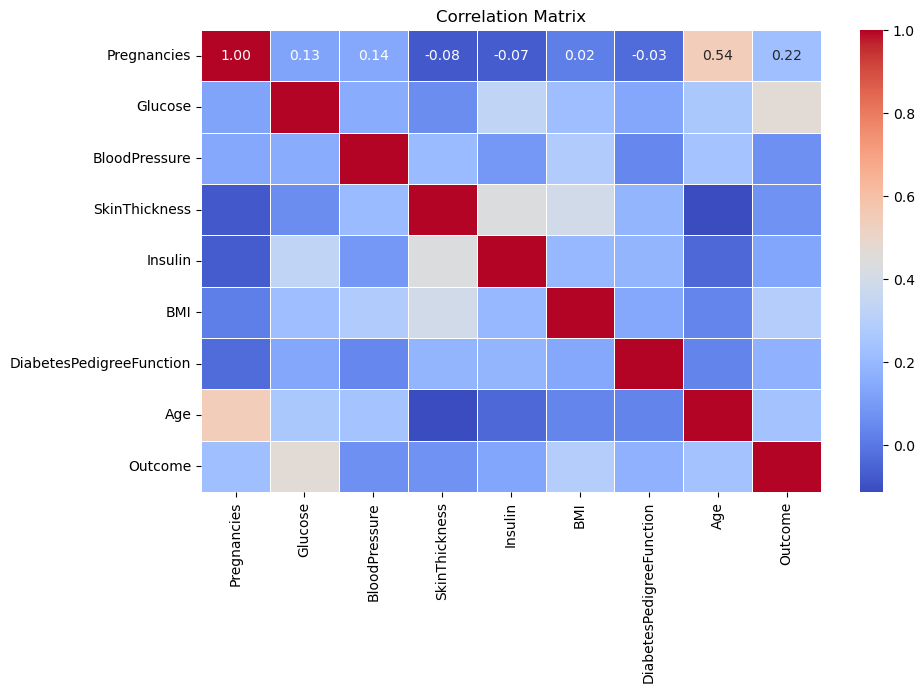

In [47]:
correlation_matrix = raw_data.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

#### Split the dataset into test, train and validation sets

In [48]:
# Convert all columns to float
raw_data = raw_data.astype(float)

# Split the data into features (X) and labels (Y)
X = raw_data.iloc[:, :-1].values  # All columns except the last one
Y = raw_data.iloc[:, -1].values   # The last column

# Split the data into training and temporary sets (80% train, 20% temporary), with stratification
X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

# Split the temporary set into testing and validation sets (50% test, 50% validation of the temporary set), with stratification
X_test, X_val, Y_test, Y_val = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=42, stratify=Y_temp)

# Convert the splits into numpy arrays
X_train = np.array(X_train)
X_temp = np.array(X_temp)
X_test = np.array(X_test)
X_val = np.array(X_val)
Y_train = np.array(Y_train)
Y_temp = np.array(Y_temp)
Y_test = np.array(Y_test)
Y_val = np.array(Y_val)

#### Custom function to use to calculate metrics for all the experiments

In [49]:
def calculate_metrics(y_true, y_pred, y_pred_proba=None):
    """
    Calculate and print various classification metrics.

    Parameters:
    y_true (array-like): True labels.
    y_pred (array-like): Predicted labels.

    Returns:
    dict: A dictionary containing the calculated metrics.
    """
    metrics = {}
    
    # Accuracy
    metrics['accuracy'] = accuracy_score(y_true, y_pred)
    
    # Precision
    metrics['precision'] = precision_score(y_true, y_pred)
    
    # Recall
    metrics['recall'] = recall_score(y_true, y_pred)
    
    # F1 Score
    metrics['f1'] = f1_score(y_true, y_pred)
    
    # F10 Score (F-beta score with beta=10)
    metrics['f10'] = fbeta_score(y_true, y_pred, beta=10)
    
    # AUC (Area Under the ROC Curve)
    if y_pred_proba is not None:
        metrics['auc'] = roc_auc_score(y_true, y_pred_proba)
    else:
        metrics['auc'] = None
    
    # Print metrics
    print(f"Accuracy: {metrics['accuracy']:.4f}")
    print(f"Precision: {metrics['precision']:.4f}")
    print(f"Recall: {metrics['recall']:.4f}")
    print(f"F1 Score: {metrics['f1']:.4f}")
    print(f"F10 Score: {metrics['f10']:.4f}")
    if metrics['auc'] is not None:
        print(f"AUC: {metrics['auc']:.4f}")
    else:
        print("AUC: N/A (y_pred_proba not provided)")
    
    return metrics

## **Building the Perceptron:**

### Baseline Perceptron:

In [50]:
#Baseline Perceptron with learning rate 0.01 and 50 iterations
#Activation function: - Unit step function

class Perceptron_Baseline:

    #Initiliasing the weights, learning rate and number of iterations
    def __init__(self, eta=0.01, n_iter=50):
        self.eta = eta
        self.n_iter = n_iter
        self.weights = None
        self.bias = None

    #Fit Model explained in the report
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iter):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self._activation_function(linear_output)

                update = self.eta * (y[idx] - y_predicted)
                self.weights += update * x_i
                self.bias += update

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        y_predicted = self._activation_function(linear_output)
        return y_predicted

    #Unit Step Function
    def _activation_function(self, x):
        return np.where(x >= 0, 1, 0)
        # return np.sign(x)

    

In [51]:
# Initialize the Perceptron with eta=0.1 and n_iter=50
my_perceptron = Perceptron_Baseline(eta=0.1, n_iter=50)
my_perceptron.fit(X_train, Y_train)
Y_val_pred_mine = my_perceptron.predict(X_val)

#Scikit Learn Perceptron alternate Baseline:
perceptron = Perceptron(max_iter=100, eta0=0.1, random_state=42) 
perceptron.fit(X_train, Y_train) 
Y_val_pred_sklearn = perceptron.predict(X_val)


print("Baseline Metrics:\nMetrics for custom Perceptron:")
metrics_mine = calculate_metrics(Y_val, Y_val_pred_mine)

#Might not be relevant
print("\nMetrics for Perceptron Class used from SciKit Learn")
metrics_sklearn = calculate_metrics(Y_val, Y_val_pred_sklearn)


Baseline Metrics:
Metrics for custom Perceptron:
Accuracy: 0.6104
Precision: 0.4286
Recall: 0.3333
F1 Score: 0.3750
F10 Score: 0.3341
AUC: N/A (y_pred_proba not provided)

Metrics for Perceptron Class used from SciKit Learn
Accuracy: 0.4286
Precision: 0.3692
Recall: 0.8889
F1 Score: 0.5217
F10 Score: 0.8767
AUC: N/A (y_pred_proba not provided)


### Experiment 1: Try learning rates 0.1, 0.01, 0.001 for Baseline Perceptron

#### Trying Baseline perceptron through hyper-parameter optimisation to try and find the best learning rate

In [52]:
learning_rates = [0.01, 0.001, 0.1]

# Loop over each learning rate
for eta in learning_rates:
    print(f"\nTraining Perceptron with learning rate: {eta}")
    
    # Initialize the Perceptron with the current learning rate and 100 iterations
    perceptron = Perceptron_Baseline(eta=eta, n_iter=100)
    
    # Fit the Perceptron model
    perceptron.fit(X_train, Y_train)
    
    # Predict on the validation set
    Y_val_pred = perceptron.predict(X_val)
    
    # Print metrics
    print(f"\nMetrics for Baseline Perceptron with learning rate {eta}")
    metrics = calculate_metrics(Y_val, Y_val_pred)
    


Training Perceptron with learning rate: 0.01

Metrics for Baseline Perceptron with learning rate 0.01
Accuracy: 0.5974
Precision: 0.1667
Recall: 0.0370
F1 Score: 0.0606
F10 Score: 0.0373
AUC: N/A (y_pred_proba not provided)

Training Perceptron with learning rate: 0.001

Metrics for Baseline Perceptron with learning rate 0.001
Accuracy: 0.5974
Precision: 0.1667
Recall: 0.0370
F1 Score: 0.0606
F10 Score: 0.0373
AUC: N/A (y_pred_proba not provided)

Training Perceptron with learning rate: 0.1

Metrics for Baseline Perceptron with learning rate 0.1
Accuracy: 0.5974
Precision: 0.1667
Recall: 0.0370
F1 Score: 0.0606
F10 Score: 0.0373
AUC: N/A (y_pred_proba not provided)


### Experiment 2: Change activation function to ***sigmoid()***

In [53]:
class Perceptron_sigmoid:
    def __init__(self, eta=0.01, n_iter=50):
        self.eta = eta
        self.n_iter = n_iter
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iter):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self._activation_function(linear_output)

                update = self.eta * (y[idx] - y_predicted)
                self.weights += update * x_i
                self.bias += update

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        y_predicted = self._activation_function(linear_output)
        return np.where(y_predicted >= 0.5, 1, 0)

# Using Sigmoid activation function
    def _activation_function(self, x):
        return 1 / (1 + np.exp(-x))


# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Initialize the Perceptron with eta=0.01 and n_iter=100
perceptron = Perceptron_sigmoid(eta=0.001, n_iter=100)

# Fit the Perceptron model
perceptron.fit(X_train_scaled, Y_train)

# Predict on the validation set
Y_val_pred = perceptron.predict(X_val_scaled)
print("\nMetrics for Perceptron Class with sigmoid activation function")
metrics_sklearn = calculate_metrics(Y_val, Y_val_pred)



Metrics for Perceptron Class with sigmoid activation function
Accuracy: 0.7403
Precision: 0.6842
Recall: 0.4815
F1 Score: 0.5652
F10 Score: 0.4829
AUC: N/A (y_pred_proba not provided)


#### Trying sigmoid perceptron through hyper-parameter optimisation to try and find the best learning rate - [0.001 found to be the best]

In [54]:
# Define the learning rates to try
learning_rates = [0.01, 0.001, 0.1]

# Loop over each learning rate
for eta in learning_rates:
    print(f"\nTraining Sigmoid Perceptron with learning rate: {eta}")
    
    # Initialize the Perceptron with the current learning rate and 100 iterations
    perceptron = Perceptron_sigmoid(eta=eta, n_iter=100)
    
    # Fit the Perceptron model
    perceptron.fit(X_train_scaled, Y_train)
    
    # Predict on the validation set
    Y_val_pred = perceptron.predict(X_val_scaled)
    
    # Print metrics
    print(f"\nMetrics for Perceptron with learning rate {eta}")
    metrics = calculate_metrics(Y_val, Y_val_pred)


Training Sigmoid Perceptron with learning rate: 0.01

Metrics for Perceptron with learning rate 0.01
Accuracy: 0.7143
Precision: 0.6190
Recall: 0.4815
F1 Score: 0.5417
F10 Score: 0.4825
AUC: N/A (y_pred_proba not provided)

Training Sigmoid Perceptron with learning rate: 0.001

Metrics for Perceptron with learning rate 0.001
Accuracy: 0.7403
Precision: 0.6842
Recall: 0.4815
F1 Score: 0.5652
F10 Score: 0.4829
AUC: N/A (y_pred_proba not provided)

Training Sigmoid Perceptron with learning rate: 0.1

Metrics for Perceptron with learning rate 0.1
Accuracy: 0.7013
Precision: 0.5909
Recall: 0.4815
F1 Score: 0.5306
F10 Score: 0.4824
AUC: N/A (y_pred_proba not provided)


### Using Sigmoid activation function for the next couple of experiments as it produced the best results compared to Baseline

### Experiment 3: Use early stopping on Perceptron with sigmoid function as it has better metrics.

In [55]:
class Perceptron_ES:
    def __init__(self, eta=0.01, n_iter=1000):
        self.eta = eta  # Learning rate
        self.n_iter = n_iter  # Number of epochs
        self.weights = None
        self.bias = None

    def fit(self, X_train, y_train, X_val, y_val):
        n_samples, n_features = X_train.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        best_val_loss = float('inf')
        epochs_no_improve = 0
        early_stop = False

        for epoch in range(self.n_iter):  # Loop over epochs
            if early_stop:
                break

            for idx, x_i in enumerate(X_train):  # Loop over each training example
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self._activation_function(linear_output)

                # Calculate the update
                update = self.eta * (y_train[idx] - y_predicted)
                
                # Update weights and bias
                self.weights += update * x_i  # Update weights
                self.bias += update  # Update bias

            # Calculate training and validation loss and accuracy
            train_loss = self._compute_loss(X_train, y_train)
            val_loss = self._compute_loss(X_val, y_val)
            val_accuracy = self._compute_accuracy(X_val, y_val)

            # Print metrics every epoch
            # print(f'Epoch {epoch+1}/{self.n_iter} - Training Loss: {train_loss:.4f} - Validation Loss: {val_loss:.4f} - Validation Accuracy: {val_accuracy:.4f}')

            # Early stopping condition
            if val_loss < best_val_loss:
                best_val_loss = val_loss
                epochs_no_improve = 0
            else:
                epochs_no_improve += 1

            if epochs_no_improve >= 3:
                print(f"Early stopping at epoch {epoch+1} due to no improvement in validation loss for 3 consecutive epochs.")
                early_stop = True

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        y_predicted = self._activation_function(linear_output)
        return np.where(y_predicted >= 0.5, 1, 0)

    def _activation_function(self, x):
        return 1 / (1 + np.exp(-x)) 


## Computing loss to capture the best one
    def _compute_loss(self, X, y):
        linear_output = np.dot(X, self.weights) + self.bias
        y_predicted = self._activation_function(linear_output)
        # Binary cross-entropy loss
        loss = -np.mean(y * np.log(y_predicted + 1e-15) + (1 - y) * np.log(1 - y_predicted + 1e-15))
        return loss

    def _compute_accuracy(self, X, y):
        y_predicted = self.predict(X)
        accuracy = np.mean(y == y_predicted)
        return accuracy


In [56]:
# Define the learning rates to try
learning_rates = [0.01, 0.001, 0.1]

# Loop over each learning rate
for eta in learning_rates:
    print(f"\nTraining Perceptron with learning rate: {eta}")
    
    # Initialize the Perceptron with the current learning rate and 100 iterations
    perceptron = Perceptron_ES(eta=eta, n_iter=100)
    
    # Fit the Perceptron model
    perceptron.fit(X_train_scaled, Y_train, X_val_scaled, Y_val)
    
    # Predict on the validation set
    Y_val_pred = perceptron.predict(X_val_scaled)
    
    # Print metrics
    print(f"\nMetrics for Perceptron with learning rate {eta}")
    metrics = calculate_metrics(Y_val, Y_val_pred)


Training Perceptron with learning rate: 0.01
Early stopping at epoch 6 due to no improvement in validation loss for 3 consecutive epochs.

Metrics for Perceptron with learning rate 0.01
Accuracy: 0.7143
Precision: 0.6190
Recall: 0.4815
F1 Score: 0.5417
F10 Score: 0.4825
AUC: N/A (y_pred_proba not provided)

Training Perceptron with learning rate: 0.001
Early stopping at epoch 30 due to no improvement in validation loss for 3 consecutive epochs.

Metrics for Perceptron with learning rate 0.001
Accuracy: 0.7403
Precision: 0.6667
Recall: 0.5185
F1 Score: 0.5833
F10 Score: 0.5197
AUC: N/A (y_pred_proba not provided)

Training Perceptron with learning rate: 0.1
Early stopping at epoch 4 due to no improvement in validation loss for 3 consecutive epochs.

Metrics for Perceptron with learning rate 0.1
Accuracy: 0.7013
Precision: 0.5909
Recall: 0.4815
F1 Score: 0.5306
F10 Score: 0.4824
AUC: N/A (y_pred_proba not provided)


### Experiment 4: Capture the highest Accuracy/F10 Score

#### Mimicing the early stopping method but if early stopping is triggered, the best performance metrics are restored and returned

In [57]:
class Perceptron_ES2:
    def __init__(self, eta=0.01, n_iter=1000):
        self.eta = eta  # Learning rate
        self.n_iter = n_iter  # Number of epochs
        self.weights = None
        self.bias = None

    def fit(self, X_train, y_train, X_val, y_val):
        n_samples, n_features = X_train.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        best_val_f10 = 0
        best_weights = None
        best_bias = None
        early_stop = False

        for epoch in range(self.n_iter):  # Loop over epochs
            if early_stop:
                break

            for idx, x_i in enumerate(X_train):  # Loop over each training example
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self._activation_function(linear_output)

                # Calculate the update
                update = self.eta * (y_train[idx] - y_predicted)
                
                # Update weights and bias
                self.weights += update * x_i  # Update weights
                self.bias += update  # Update bias

            # Calculate training and validation loss and F10 score
            train_loss = self._compute_loss(X_train, y_train)
            val_loss = self._compute_loss(X_val, y_val)
            val_f10 = self._compute_f10(X_val, y_val)

            # Print metrics every 100 epochs
            if (epoch + 1) % 100 == 0:
                print(f'Epoch {epoch+1}/{self.n_iter} - Training Loss: {train_loss:.4f} - Validation Loss: {val_loss:.4f} - Validation F10 Score: {val_f10:.4f}')
                print(f'Weights: {self.weights} - Bias: {self.bias}')

            # Early stopping condition
            if epoch > 0 and (best_val_f10 - val_f10) > 0.01:
                print(f"Early stopping at epoch {epoch+1} due to validation F10 score drop.")
                early_stop = True
                # Restore the best weights and bias
                self.weights = best_weights
                self.bias = best_bias
            else:
                if val_f10 > best_val_f10:
                    best_val_f10 = val_f10
                    best_weights = self.weights.copy()
                    best_bias = self.bias

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        y_predicted = self._activation_function(linear_output)
        return np.where(y_predicted >= 0.5, 1, 0)

    def _activation_function(self, x):
        return 1 / (1 + np.exp(-x))  # Sigmoid activation function

    def _compute_loss(self, X, y):
        linear_output = np.dot(X, self.weights) + self.bias
        y_predicted = self._activation_function(linear_output)
        # Binary cross-entropy loss
        loss = -np.mean(y * np.log(y_predicted + 1e-15) + (1 - y) * np.log(1 - y_predicted + 1e-15))
        return loss

    def _compute_f10(self, X, y):
        y_predicted = self.predict(X)
        return fbeta_score(y, y_predicted, beta=10)


In [58]:
# Define the learning rates to try
learning_rates = [0.01, 0.001, 0.1]

# Loop over each learning rate
for eta in learning_rates:
    print(f"\nTraining Perceptron with learning rate: {eta}")
    
    # Initialize the Perceptron with the current learning rate and 100 iterations
    perceptron = Perceptron_ES2(eta=eta, n_iter=100)
    
    # Fit the Perceptron model
    perceptron.fit(X_train_scaled, Y_train, X_val_scaled, Y_val)
    
    # Predict on the validation set
    Y_val_pred = perceptron.predict(X_val_scaled)
    
    # Print metrics
    print(f"\nMetrics for Perceptron with learning rate {eta}")
    metrics = calculate_metrics(Y_val, Y_val_pred)


Training Perceptron with learning rate: 0.01
Early stopping at epoch 2 due to validation F10 score drop.

Metrics for Perceptron with learning rate 0.01
Accuracy: 0.7662
Precision: 0.6800
Recall: 0.6296
F1 Score: 0.6538
F10 Score: 0.6301
AUC: N/A (y_pred_proba not provided)

Training Perceptron with learning rate: 0.001
Early stopping at epoch 5 due to validation F10 score drop.

Metrics for Perceptron with learning rate 0.001
Accuracy: 0.7922
Precision: 0.7200
Recall: 0.6667
F1 Score: 0.6923
F10 Score: 0.6672
AUC: N/A (y_pred_proba not provided)

Training Perceptron with learning rate: 0.1
Epoch 100/100 - Training Loss: 0.4858 - Validation Loss: 0.5371 - Validation F10 Score: 0.4824
Weights: [ 0.208283    1.4171902  -0.26843789  0.07176205 -0.12459433  1.0973261
  0.36172163  0.01805526] - Bias: -0.8418061136824619

Metrics for Perceptron with learning rate 0.1
Accuracy: 0.7013
Precision: 0.5909
Recall: 0.4815
F1 Score: 0.5306
F10 Score: 0.4824
AUC: N/A (y_pred_proba not provided)


### The best Perceptron is the one with a learning rate of 0.001 with 5 epochs

In [59]:
class Perceptron_final:
    def __init__(self, eta=0.01, n_iter=100):
        self.eta = eta  # Learning rate
        self.n_iter = n_iter  # Number of epochs
        self.weights = None
        self.bias = None

    def fit(self, X_train, y_train, X_val, y_val):
        n_samples, n_features = X_train.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        best_f1_score = 0
        best_accuracy = 0
        best_weights = None
        best_bias = None
        self.train_losses = []
        self.val_losses = []
        self.val_f1_scores = []
        self.val_accuracies = []

        for epoch in range(self.n_iter):  # Loop over epochs
            for idx, x_i in enumerate(X_train):  # Loop over each training example
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self._activation_function(linear_output)

                # Calculate the update
                update = self.eta * (y_train[idx] - y_predicted)
                
                # Update weights and bias
                self.weights += update * x_i  # Update weights
                self.bias += update  # Update bias

            # Calculate training and validation loss and accuracy
            train_loss = self._compute_loss(X_train, y_train)
            val_loss = self._compute_loss(X_val, y_val)
            val_predictions = self.predict(X_val)
            val_f1 = f1_score(y_val, val_predictions)
            val_accuracy = accuracy_score(y_val, val_predictions)

            self.train_losses.append(train_loss)
            self.val_losses.append(val_loss)
            self.val_f1_scores.append(val_f1)
            self.val_accuracies.append(val_accuracy)

            # Print metrics every 10 epochs
            if (epoch + 1) % 10 == 0:
                print(f'Epoch {epoch+1}/{self.n_iter} - Training Loss: {train_loss:.4f} - Validation Loss: {val_loss:.4f} - Validation F1 Score: {val_f1:.4f} - Validation Accuracy: {val_accuracy:.4f}')

            # Track the best model based on F1 score
            if val_f1 > best_f1_score:
                best_f1_score = val_f1
                best_accuracy = val_accuracy
                best_weights = self.weights.copy()
                best_bias = self.bias

        # Restore the best weights and bias
        self.weights = best_weights
        self.bias = best_bias

        print(f"\nBest Validation F1 Score: {best_f1_score:.4f}")
        print(f"Best Validation Accuracy: {best_accuracy:.4f}")

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        y_predicted = self._activation_function(linear_output)
        return np.where(y_predicted >= 0.5, 1, 0)

    def _activation_function(self, x):
        return 1 / (1 + np.exp(-x))  # Sigmoid activation function

    def _compute_loss(self, X, y):
        linear_output = np.dot(X, self.weights) + self.bias
        y_predicted = self._activation_function(linear_output)
        # Binary cross-entropy loss
        loss = -np.mean(y * np.log(y_predicted + 1e-15) + (1 - y) * np.log(1 - y_predicted + 1e-15))
        return loss

Epoch 10/100 - Training Loss: 0.4936 - Validation Loss: 0.4735 - Validation F1 Score: 0.6538 - Validation Accuracy: 0.7662
Epoch 20/100 - Training Loss: 0.4743 - Validation Loss: 0.4582 - Validation F1 Score: 0.6275 - Validation Accuracy: 0.7532
Epoch 30/100 - Training Loss: 0.4691 - Validation Loss: 0.4572 - Validation F1 Score: 0.5833 - Validation Accuracy: 0.7403
Epoch 40/100 - Training Loss: 0.4674 - Validation Loss: 0.4585 - Validation F1 Score: 0.5652 - Validation Accuracy: 0.7403
Epoch 50/100 - Training Loss: 0.4667 - Validation Loss: 0.4601 - Validation F1 Score: 0.5652 - Validation Accuracy: 0.7403
Epoch 60/100 - Training Loss: 0.4664 - Validation Loss: 0.4614 - Validation F1 Score: 0.5652 - Validation Accuracy: 0.7403
Epoch 70/100 - Training Loss: 0.4663 - Validation Loss: 0.4623 - Validation F1 Score: 0.5652 - Validation Accuracy: 0.7403
Epoch 80/100 - Training Loss: 0.4663 - Validation Loss: 0.4630 - Validation F1 Score: 0.5652 - Validation Accuracy: 0.7403
Epoch 90/100 - T

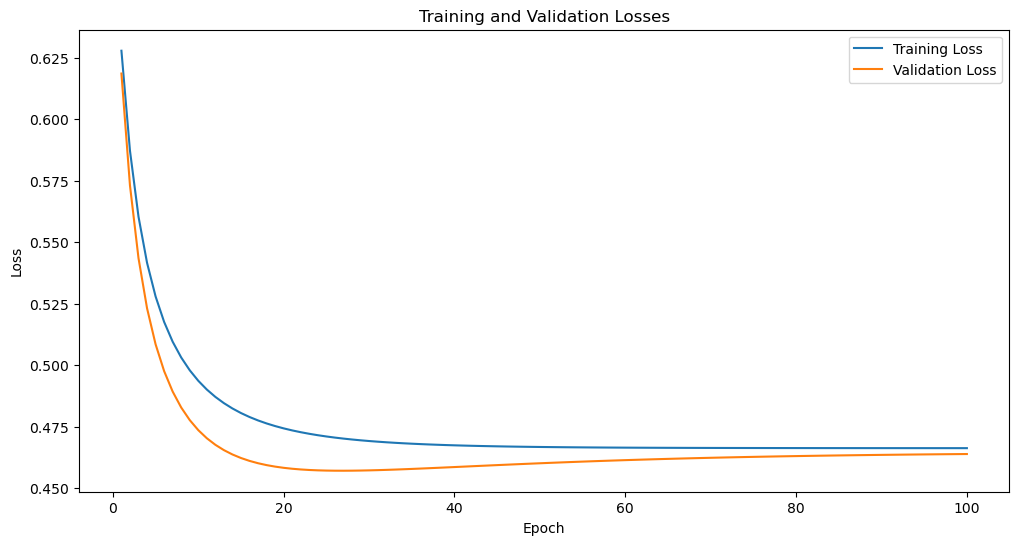

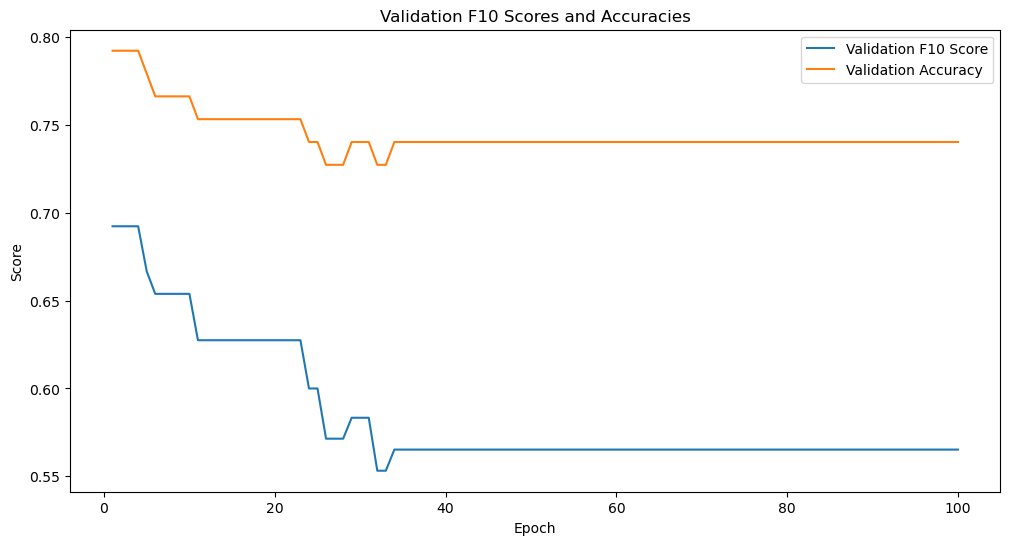

In [60]:
# Initialize the Perceptron with eta=0.001 and n_iter=100
perceptron_final = Perceptron_final(eta=0.001, n_iter=100)

# Fit the Perceptron model
perceptron_final.fit(X_train_scaled, Y_train, X_val_scaled, Y_val)

# Predict on the validation set
Y_val_pred = perceptron_final.predict(X_val_scaled)

# Print metrics
print(f"\nMetrics for Perceptron with learning rate {perceptron_final.eta}")
metrics = calculate_metrics(Y_val, Y_val_pred)

# Plot training and validation losses
plt.figure(figsize=(12, 6))
plt.plot(range(1, perceptron_final.n_iter + 1), perceptron_final.train_losses, label='Training Loss')
plt.plot(range(1, perceptron_final.n_iter + 1), perceptron_final.val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Losses')
plt.legend()
plt.show()

# Plot validation F1 scores and accuracies
plt.figure(figsize=(12, 6))
plt.plot(range(1, perceptron_final.n_iter + 1), perceptron_final.val_f1_scores, label='Validation F10 Score')
plt.plot(range(1, perceptron_final.n_iter + 1), perceptron_final.val_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Score')
plt.title('Validation F10 Scores and Accuracies')
plt.legend()
plt.show()

In [62]:
print("Metrics for the Baseline Perceptron model on test set:")
baseline_predictions = my_perceptron.predict(X_test)
metrics = calculate_metrics(Y_test, baseline_predictions)

print("\nMetrics for the Sigmoid Perceptron model on test set:")
sigmoid_predictions = perceptron_final.predict(X_test_scaled)
metrics = calculate_metrics(Y_test, sigmoid_predictions)


Metrics for the Baseline Perceptron model on test set:
Accuracy: 0.6494
Precision: 0.5000
Recall: 0.2963
F1 Score: 0.3721
F10 Score: 0.2975
AUC: N/A (y_pred_proba not provided)

Metrics for the Sigmoid Perceptron model on test set:
Accuracy: 0.6234
Precision: 0.4688
Recall: 0.5556
F1 Score: 0.5085
F10 Score: 0.5545
AUC: N/A (y_pred_proba not provided)
